<a href="https://colab.research.google.com/github/BharathReddyRamasani/AI_DS/blob/main/Ensemble_Learning_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
base_model=DecisionTreeClassifier(max_depth=1)
classifier=AdaBoostClassifier(estimator=base_model,n_estimators=200,learning_rate=1)
classifier.fit(x_train,y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=200)

In [ ]:
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.85

[[48  4]
 [ 8 20]]


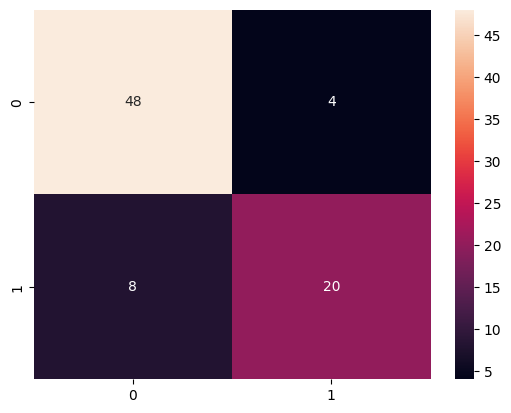

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        52
           1       0.83      0.71      0.77        28

    accuracy                           0.85        80
   macro avg       0.85      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(y_test,y_pred))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
classifier=GradientBoostingClassifier(n_estimators=50,max_depth=3,learning_rate=1)
classifier.fit(x_train,y_train)


GradientBoostingClassifier(learning_rate=1, n_estimators=50)

In [ ]:
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.875

[[46  6]
 [ 4 24]]


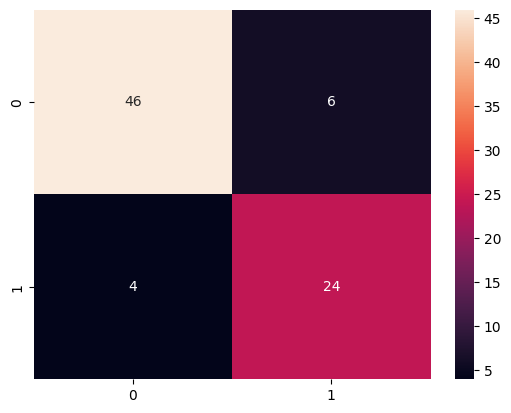

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        52
           1       0.80      0.86      0.83        28

    accuracy                           0.88        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.88      0.88      0.88        80



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(y_test,y_pred))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier as XGBoostClassifier
from sklearn.metrics import accuracy_score
classifier=XGBoostClassifier(n_estimators=50,max_depth=3,learning_rate=1,randon_state=42,use_label_encoder=False,subsample=0.8,colsample_bytree=0.8
                             )
classifier.fit(x_train,y_train)
# classifier=GradientBoostingClassifier(n_estimators=50,max_depth=3,learning_rate=1)
# classifier.fit(x_train,y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:20:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "randon_state", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.9

[[48  4]
 [ 4 24]]


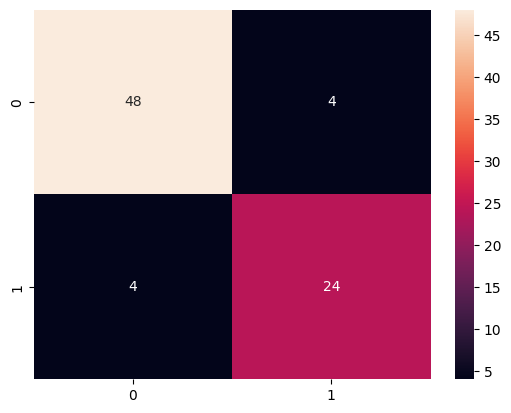

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        52
           1       0.86      0.86      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(y_test,y_pred))


# **telco churn **

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    recall_score,
    precision_score,
    f1_score
)
df=pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()

In [ ]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


/tmp/ipython-input-1067100781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [ ]:
features = [
    "tenure",
    "MonthlyCharges",
    "Contract",
    "PaymentMethod",
    "InternetService",
    "SeniorCitizen"
]

X = df[features]
y = df["Churn"]

In [ ]:
num_features = ["tenure", "MonthlyCharges"]
cat_features = ["Contract", "PaymentMethod", "InternetService", "SeniorCitizen"]


In [ ]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [ ]:
baseline_model = Pipeline([
    ("prep", preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=6,
        min_samples_leaf=50,
        random_state=42
    ))
])

In [ ]:
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

# Baseline metrics
baseline_results = {
    "Accuracy": accuracy_score(y_test, y_pred_base),
    "Recall (Churn)": recall_score(y_test, y_pred_base),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_base)
}

In [ ]:
baseline_results

{'Accuracy': 0.7929465301478953,
 'Recall (Churn)': 0.4796573875802998,
 'Confusion Matrix': array([[1170,  121],
        [ 243,  224]])}

In [ ]:
ensemble_model = Pipeline([
    ("prep", preprocessor),
    ("model", GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])


In [ ]:
ensemble_model.fit(X_train, y_train)
y_pred_ens = ensemble_model.predict(X_test)
# Ensemble metrics
ensemble_results = {
    "Accuracy": accuracy_score(y_test, y_pred_ens),
    "Precision": precision_score(y_test, y_pred_ens),
    "Recall": recall_score(y_test, y_pred_ens),
    "F1": f1_score(y_test, y_pred_ens),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_ens)
}

In [ ]:
baseline_results, ensemble_results

({'Accuracy': 0.7929465301478953,
  'Recall (Churn)': 0.4796573875802998,
  'Confusion Matrix': array([[1170,  121],
         [ 243,  224]])},
 {'Accuracy': 0.7861205915813424,
  'Precision': 0.6219839142091153,
  'Recall': 0.49678800856531047,
  'F1': 0.5523809523809524,
  'Confusion Matrix': array([[1150,  141],
         [ 235,  232]])})

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
ensemble_model_xg = Pipeline([
    ("prep", preprocessor),
    ("model", XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    ))
])



In [ ]:
ensemble_model_xg.fit(X_train, y_train)

y_pred_ens_xg = ensemble_model_xg.predict(X_test)

ensemble_results_xg = {
    "Accuracy": accuracy_score(y_test, y_pred_ens_xg),
    "Precision": precision_score(y_test, y_pred_ens_xg),
    "Recall": recall_score(y_test, y_pred_ens_xg),
    "F1": f1_score(y_test, y_pred_ens_xg),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_ens_xg)
}


In [ ]:
ensemble_results_xg

{'Accuracy': 0.7935153583617748,
 'Precision': 0.6397849462365591,
 'Recall': 0.5096359743040685,
 'F1': 0.567342073897497,
 'Confusion Matrix': array([[1157,  134],
        [ 229,  238]])}

# **Stacking**

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [4]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)



In [9]:
#define base models
base_models=[
    ('lr',LogisticRegression()),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('dt',DecisionTreeClassifier(max_depth=3))
]


In [10]:
meta_model=LogisticRegression()


In [11]:
classifier=StackingClassifier(estimators=base_models,final_estimator=meta_model,cv=5)
classifier.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(max_depth=3))],
                   final_estimator=LogisticRegression())

In [12]:
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.9

[[47  5]
 [ 3 25]]


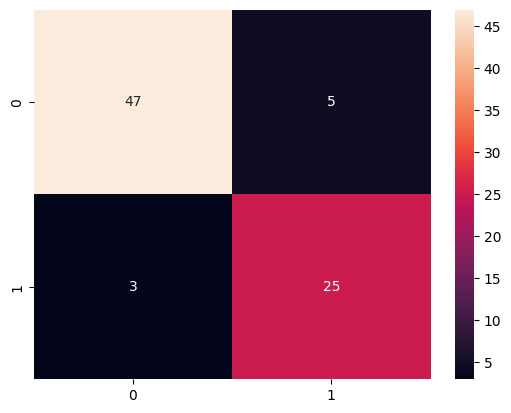

In [13]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



# **house sales pred**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df=pd.read_csv('/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [97]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [98]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [99]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [100]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# x=df.iloc[:,[5:11]].values
# y=df.iloc[:,-1].values


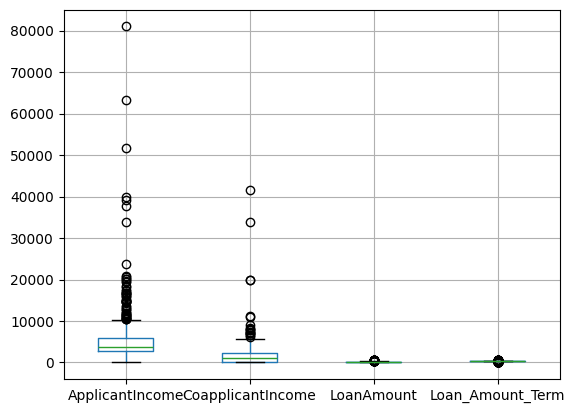

In [101]:
boxplots=df.boxplot(column=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])

In [102]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['LoanAmount']=np.log(df['LoanAmount'])
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])



In [103]:
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})
df["Self_Employed"] = df["Self_Employed"].map({"Yes": 1, "No": 0})

In [104]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,0,8.674026,0.0,4.986426,5.886104,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,0,8.430109,1508.0,4.852030,5.886104,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,1,8.006368,0.0,4.189655,5.886104,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,0,7.856707,2358.0,4.787492,5.886104,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,0,8.699515,0.0,4.948760,5.886104,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,0,7.972466,0.0,4.262680,5.886104,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,0,8.320205,0.0,3.688879,5.192957,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,0,8.996157,240.0,5.533389,5.886104,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,0,8.933664,0.0,5.231109,5.886104,1.0,Urban,1


In [105]:
x=df.iloc[:,5:11].values
y=df.iloc[:,-1].values
x

array([[0.00000000e+00, 8.67402599e+00, 0.00000000e+00, 4.98642567e+00,
        5.88610403e+00, 1.00000000e+00],
       [0.00000000e+00, 8.43010908e+00, 1.50800000e+03, 4.85203026e+00,
        5.88610403e+00, 1.00000000e+00],
       [1.00000000e+00, 8.00636757e+00, 0.00000000e+00, 4.18965474e+00,
        5.88610403e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 8.99615656e+00, 2.40000000e+02, 5.53338949e+00,
        5.88610403e+00, 1.00000000e+00],
       [0.00000000e+00, 8.93366418e+00, 0.00000000e+00, 5.23110862e+00,
        5.88610403e+00, 1.00000000e+00],
       [1.00000000e+00, 8.43010908e+00, 0.00000000e+00, 4.89034913e+00,
        5.88610403e+00, 0.00000000e+00]])

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)




In [64]:
# x_train = x_train.replace([np.inf, -np.inf], np.nan)
# x_train["coapplicant_income"] = x_train["coapplicant_income"].fillna(0)

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
base_models=[
    ('xg',XGBClassifier(n_estimators=100,max_depth=3)),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('dt',DecisionTreeClassifier(max_depth=3)),
    ('rf',RandomForestClassifier(n_estimators=100,max_depth=3)),
    ('svm',SVC(kernel='rbf'))

]
meta_model=LogisticRegression()


In [128]:
model=XGBClassifier(n_estimators=100,max_depth=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)


0.7398373983739838

[[20 23]
 [ 9 71]]
              precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.76      0.89      0.82        80

    accuracy                           0.74       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.73      0.74      0.73       123



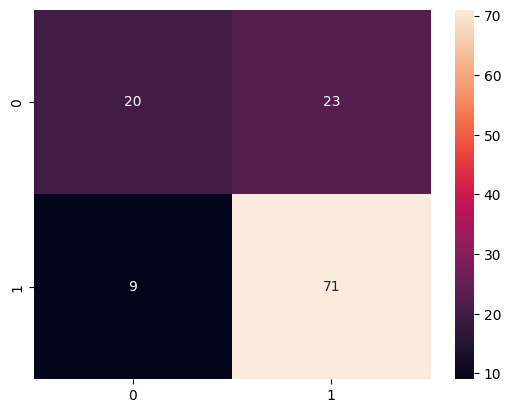

In [129]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

In [130]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)


0.7317073170731707

[[19 24]
 [ 9 71]]
              precision    recall  f1-score   support

           0       0.68      0.44      0.54        43
           1       0.75      0.89      0.81        80

    accuracy                           0.73       123
   macro avg       0.71      0.66      0.67       123
weighted avg       0.72      0.73      0.71       123



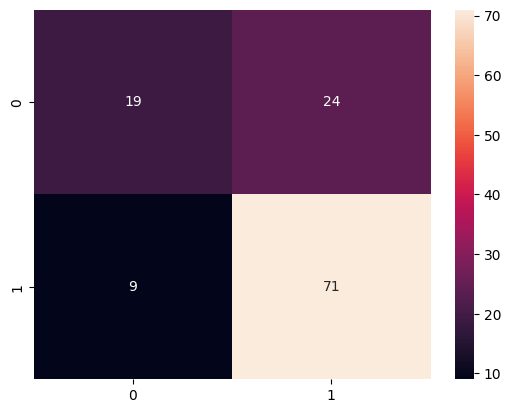

In [120]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

0.7804878048780488
[[18 25]
 [ 2 78]]
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



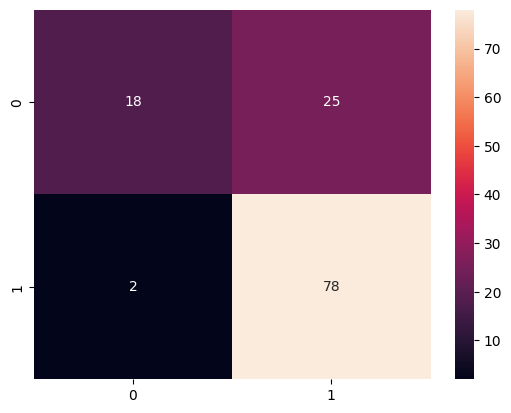

In [122]:
model=RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))


0.6504065040650406
[[ 0 43]
 [ 0 80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


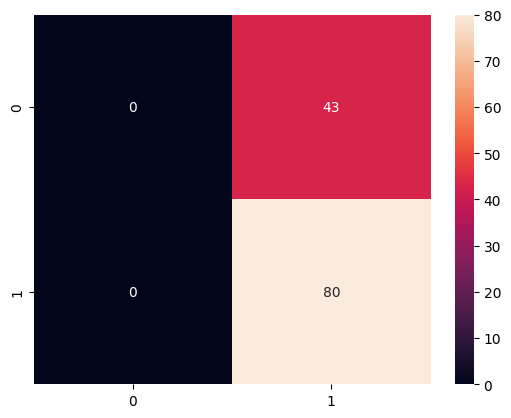

In [113]:
model=SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))


0.7073170731707317
[[13 30]
 [ 6 74]]
              precision    recall  f1-score   support

           0       0.68      0.30      0.42        43
           1       0.71      0.93      0.80        80

    accuracy                           0.71       123
   macro avg       0.70      0.61      0.61       123
weighted avg       0.70      0.71      0.67       123



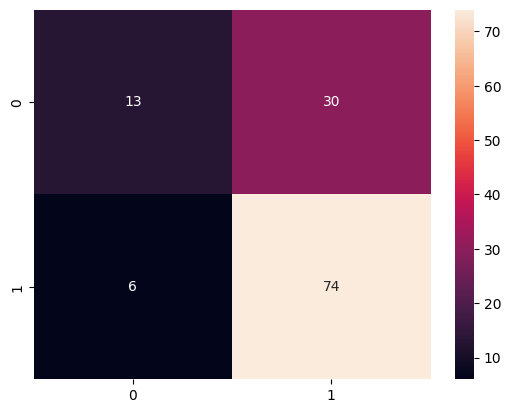

In [114]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))


In [131]:
classifier=StackingClassifier(estimators=base_models,final_estimator=meta_model,cv=25)
classifier.fit(x_train,y_train)

StackingClassifier(cv=25,
                   estimators=[('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_...
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(max_depth=3)),
                               ('rf', RandomForestClassifier(max_depth=3)),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

In [132]:
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.7804878048780488

[[18 25]
 [ 2 78]]
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



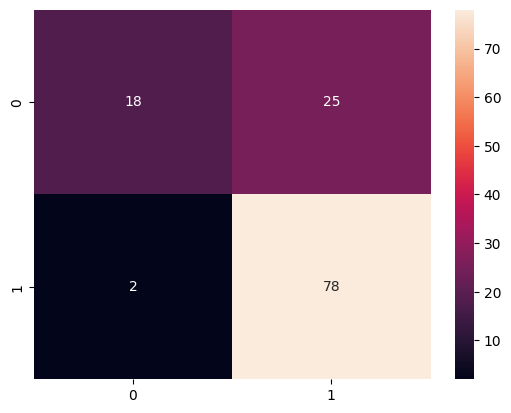

In [133]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))